In [4]:
import numpy as np
from tensorflow import keras
from keras import layers
import tensorflow

In [5]:
reuters = keras.datasets.reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

# Convert the data to one-hot encoding
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Define the model architecture
model = keras.Sequential()
model.add(layers.Embedding(10000, 128, input_length=10000))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(46, activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]



y_val = y_train[:1000]
partial_y_train = y_train[1000:]

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)



history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val,y_val))


score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

history_dict = history.history
history_dict.keys()



x_val  (1000, 10000)
y_val  (1000, 46)
partial_x_train  (7982, 10000)
partial_y_train  (7982, 46)
Epoch 1/10
63/63 [==============================] - 14s 156ms/step - loss: 2.7345 - accuracy: 0.3439 - val_loss: 2.4070 - val_accuracy: 0.3540
Epoch 2/10
63/63 [==============================] - 9s 147ms/step - loss: 2.4077 - accuracy: 0.3514 - val_loss: 2.3784 - val_accuracy: 0.3540
Epoch 3/10
63/63 [==============================] - 9s 147ms/step - loss: 2.3841 - accuracy: 0.3514 - val_loss: 2.3548 - val_accuracy: 0.3500
Epoch 4/10
63/63 [==============================] - 9s 148ms/step - loss: 2.3632 - accuracy: 0.3494 - val_loss: 2.3301 - val_accuracy: 0.3500
Epoch 5/10
63/63 [==============================] - 10s 152ms/step - loss: 2.3455 - accuracy: 0.3465 - val_loss: 2.3371 - val_accuracy: 0.3340
Epoch 6/10
63/63 [==============================] - 9s 149ms/step - loss: 2.3382 - accuracy: 0.3478 - val_loss: 2.3227 - val_accuracy: 0.3340
Epoch 7/10
63/63 [==============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [10]:
# Make predictions on new data
text = ["This is a newswire article about technology."]
x_new = tokenizer.texts_to_matrix(text, mode='binary')
y_new = model.predict(x_new)
predicted_class = np.argmax(y_new)
print(predicted_class)

3


#IMDB

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

# Load the IMDB dataset and keep only the top 5000 most frequent words
word_index = imdb.get_word_index()
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to the same length
max_review_length = 400
x_train = pad_sequences(x_train, maxlen=max_review_length)
x_test = pad_sequences(x_test, maxlen=max_review_length)

In [15]:
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(5000,
                    50,
                    input_length=400))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(250,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
model.fit(x_train, y_train,
          batch_size=32,
          epochs=4,
          validation_data=(x_test, y_test))

x_train shape: (25000, 400)
x_test shape: (25000, 400)
Epoch 1/4
782/782 [==============================] - 8s 9ms/step - loss: 0.4124 - accuracy: 0.7941 - val_loss: 0.2786 - val_accuracy: 0.8822
Epoch 2/4
782/782 [==============================] - 8s 10ms/step - loss: 0.2359 - accuracy: 0.9055 - val_loss: 0.2621 - val_accuracy: 0.8914
Epoch 3/4
782/782 [==============================] - 7s 9ms/step - loss: 0.1638 - accuracy: 0.9376 - val_loss: 0.2882 - val_accuracy: 0.8879
Epoch 4/4
782/782 [==============================] - 8s 10ms/step - loss: 0.1139 - accuracy: 0.9592 - val_loss: 0.3932 - val_accuracy: 0.8692


In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3931540548801422
Test accuracy: 0.8691999912261963


#Autoendkodery

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2133 - val_loss: 0.1378
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1233 - val_loss: 0.1122
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1069 - val_loss: 0.1012
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0994 - val_loss: 0.0959
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0950 - val_loss: 0.0921
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0920 - val_loss: 0.0900
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0897 - val_loss: 0.0880
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0877 - val_loss: 0.0864
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0862 - val_loss: 0.0851
Epoch 10/50
235/235 [==============

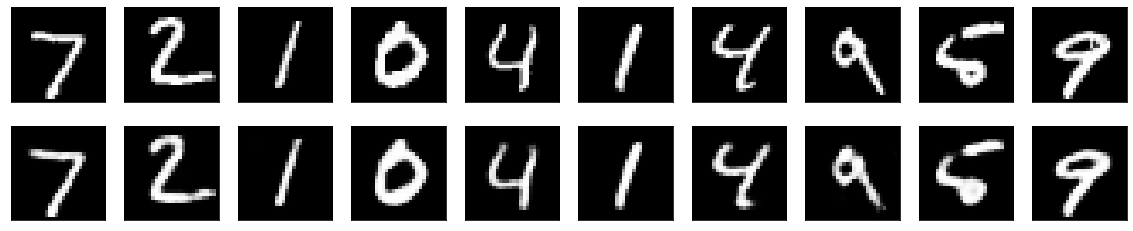

In [17]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy dane i przekształcamy na wektor
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Dekodowana wersja obrazka
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2463 - val_loss: 0.1804
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1645 - val_loss: 0.1533
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1469 - val_loss: 0.1405
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1375 - val_loss: 0.1335
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1322 - val_loss: 0.1299
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1281 - val_loss: 0.1269
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1249 - val_loss: 0.1239
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1222 - val_loss: 0.1218
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1201 - val_loss: 0.1202
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1182 - val_loss: 0.1181

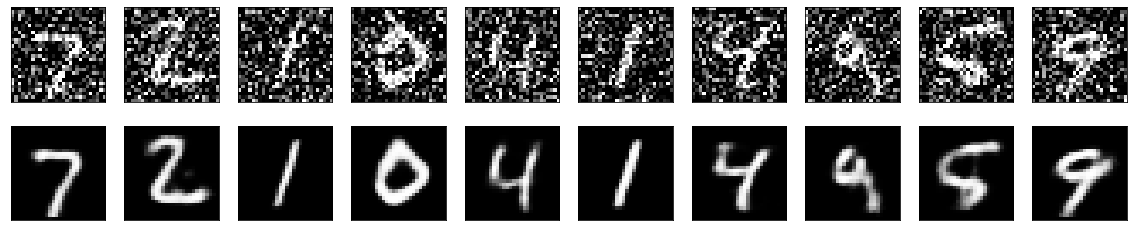

In [18]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Dodajemy szum gaussowski do obrazków
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Przekształcamy dane na wektory
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

# Trenujemy model na danych z szumem
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test_noisy)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4074 - val_loss: 0.2630
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2632 - val_loss: 0.2630
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2631 - val_loss: 0.2631
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2631 - val_loss: 0.2629
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2630 - val_loss: 0.2628
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2630 - val_loss: 0.2628
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - val_loss: 0.2629
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - val_loss: 0.262

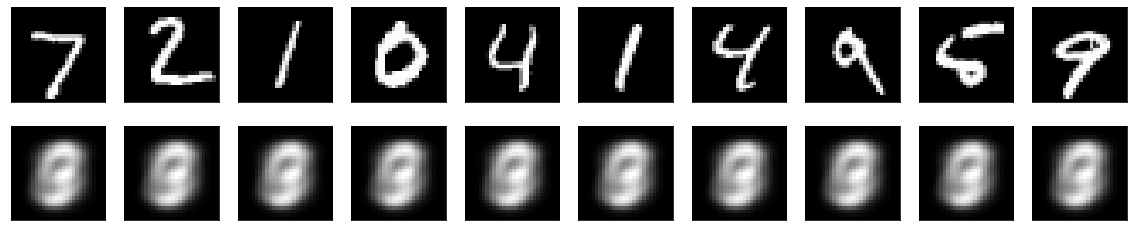

In [23]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Parametr regularyzacji rzadkości
sparsity_factor = 0.1

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(input_img)
encoded = Dense(encoding_dim2, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(encoded)
encoded = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [25]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import numpy as np

# Load MNIST dataset
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define contractive autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode test set
encoded_imgs = autoencoder.predict(x_test)


Epoch 1/10
235/235 [==============================] - 4s 9ms/step - loss: 0.2286 - val_loss: 0.1510
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1346 - val_loss: 0.1204
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1142 - val_loss: 0.1069
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1037 - val_loss: 0.0991
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0975 - val_loss: 0.0944
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0935 - val_loss: 0.0913
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0907 - val_loss: 0.0890
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0886 - val_loss: 0.0872
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0869 - val_loss: 0.0857
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0856 - val_loss: 0.0845

Epoch 1/2
469/469 [==============================] - 5s 8ms/step - loss: 0.3053 - val_loss: 0.2654
Epoch 2/2
469/469 [==============================] - 3s 5ms/step - loss: 0.2645 - val_loss: 0.2637


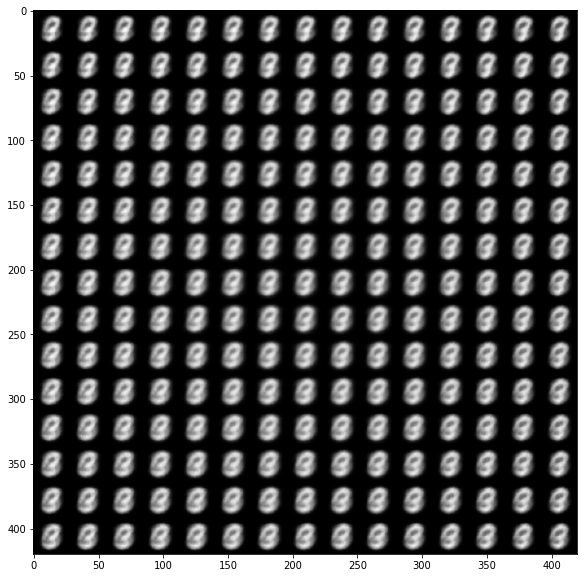

In [21]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
import numpy as np

# Define the dimensions of the latent space
latent_dim = 2

# Define the input shape
input_shape = (784,)

# Define the encoder architecture
input_layer = Input(shape=input_shape)
hidden_layer = Dense(512, activation='relu')(input_layer)
z_mean = Dense(latent_dim)(hidden_layer)
z_log_var = Dense(latent_dim)(hidden_layer)

# Define the sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Use the sampling function to sample from the latent space
z = Lambda(sampling)([z_mean, z_log_var])

# Define the decoder architecture
decoder_input = Input(shape=(latent_dim,))
decoder_hidden = Dense(512, activation='relu')(decoder_input)
decoder_output = Dense(784, activation='sigmoid')(decoder_hidden)

# Define the models
encoder = Model(input_layer, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, decoder_output, name='decoder')
vae_output = decoder(encoder(input_layer)[2])
vae = Model(input_layer, vae_output, name='vae')

# Define the loss function
reconstruction_loss = binary_crossentropy(input_layer, vae_output)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

# Compile the model
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_train = x_train.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
x_test = x_test.astype('float32') / 255.

# Train the model
vae.fit(x_train, epochs=2, batch_size=128, validation_data=(x_test, None))


import matplotlib.pyplot as plt

def display_vae_results(vae, x_test):
    # Encode the test images
    encoder = vae.get_layer('encoder')
    z_mean, _, _ = encoder.predict(x_test)

    # Generate new images by sampling from the learned distribution
    decoder = vae.get_layer('decoder')
    n = 15  # number of images to generate
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))

    # Sample from the learned distribution
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# Generate and display new images
display_vae_results(vae, x_test)

#Autoenkodery Cifar

Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 0.6407 - val_loss: 0.6125
Epoch 2/50
196/196 [==============================] - 3s 15ms/step - loss: 0.6062 - val_loss: 0.6039
Epoch 3/50
196/196 [==============================] - 3s 14ms/step - loss: 0.5996 - val_loss: 0.5981
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 0.5950 - val_loss: 0.5940
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 0.5921 - val_loss: 0.5914
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 0.5898 - val_loss: 0.5915
Epoch 7/50
196/196 [==============================] - 2s 12ms/step - loss: 0.5887 - val_loss: 0.5889
Epoch 8/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5873 - val_loss: 0.5871
Epoch 9/50
196/196 [==============================] - 2s 8ms/step - loss: 0.5860 - val_loss: 0.5858
Epoch 10/50
196/196 [==============================] - 2s 9ms/step - loss: 0.5847 - val_loss:

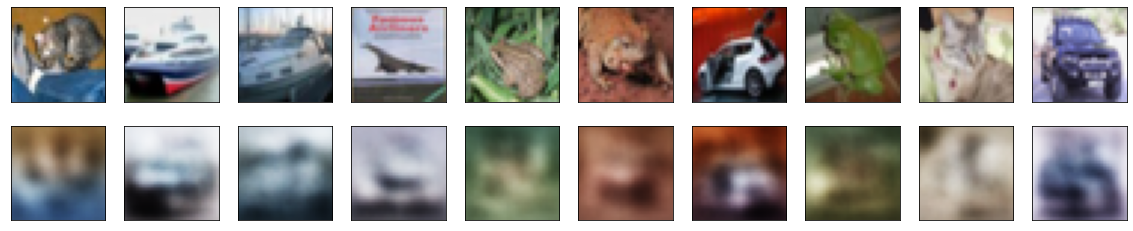

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Wymiary obrazków MNIST
input_dim = 3072

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych Cifar
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizujemy dane i przekształcamy na wektor
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Dekodowana wersja obrazka
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/50
196/196 [==============================] - 4s 14ms/step - loss: 0.6532 - val_loss: 0.6342
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 0.6209 - val_loss: 0.6143
Epoch 3/50
196/196 [==============================] - 1s 8ms/step - loss: 0.6076 - val_loss: 0.6052
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 0.6034 - val_loss: 0.6042
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 0.6003 - val_loss: 0.5996
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5982 - val_loss: 0.5991
Epoch 7/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5967 - val_loss: 0.5987
Epoch 8/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5951 - val_loss: 0.5963
Epoch 9/50
196/196 [==============================] - 2s 8ms/step - loss: 0.5941 - val_loss: 0.5947
Epoch 10/50
196/196 [==============================] - 2s 9ms/step - loss: 0.5932 - val_loss: 0.594

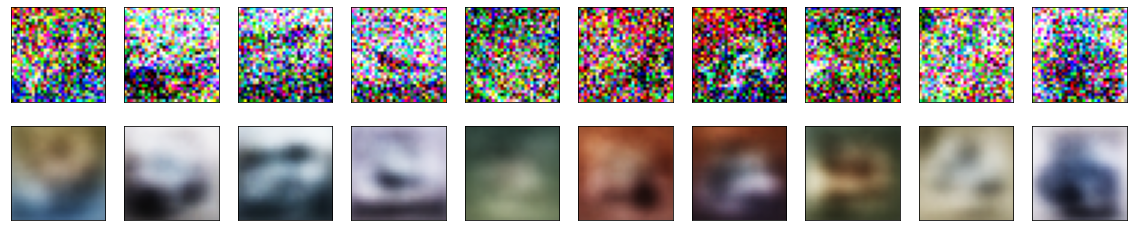

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# Wymiary obrazków MNIST
input_dim = 3072

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Dodajemy szum gaussowski do obrazków
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Przekształcamy dane na wektory
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

# Trenujemy model na danych z szumem
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test_noisy)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()